# Least square problem for polynomial regression 

## import library

In [3]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data points
- $\{ (x_i, y_i) \}_{i=1}^n$

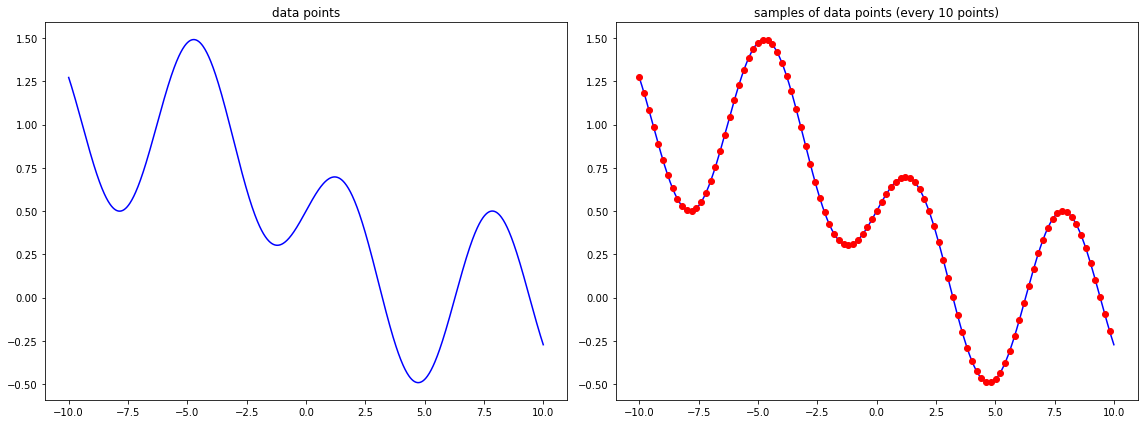

In [4]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x           = data[0, :]    # independent variable
y           = data[1, :]    # dependent variable

x_sample    = x[::10]       
y_sample    = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x, y, '-', color = 'blue')
plt.plot(x_sample, y_sample, 'o', color = 'red')
plt.title('samples of data points (every 10 points)')

plt.tight_layout()
plt.show()

## solve a linear system of equation $A z = b$
$$
A = 
\begin{bmatrix}
x_1^0 & x_1^1 & \cdots & x_1^{p-1}\\
x_2^0 & x_2^1 & \cdots & x_2^{p-1}\\
\vdots & \vdots & \vdots & \vdots\\
x_n^0 & x_n^1 & \cdots & x_n^{p-1}
\end{bmatrix},
\quad
z = 
\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_{p-1}
\end{bmatrix},
\quad
b = 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
$$

## construct matrix A for the polynomial regression with power $p-1$
- useful functions : `np.power`

In [5]:
def construct_matrix_A(x, p):
    
    n = len(x)
    A = np.zeros([n, p])
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    t = np.array([x]).swapaxes(1,0)
    A = np.ones([n, 1])
    for i in range(1, p):
        A = np.concatenate([A, np.power(t, i)], axis = 1)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return A

## construct vector $b$

In [6]:
def construct_vector_b(y):

    n = len(y)
    b = np.zeros([n, 1])

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    b = np.swapaxes(np.array([y]), 1, 0)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return b

## solve the linear system of equation $A z = b$
- without regularization : $\min \frac{1}{2 n}\| Az - b \|^2, \quad z = \left( A^T A \right)^{-1} A^T b$
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [37]:
def solve_regression(x, y, p):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    z = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)
    loss = np.sum(np.square(np.matmul(x, z) - y))/(2 * len(x))
    print(loss)
    loss = np.average(np.square(np.matmul(x, z) - y))/2
    print(loss)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

solve_regression(construct_matrix_A(x, 10), construct_vector_b(y), 10)

0.0029849037049166968
0.0029849037049166968


(array([[ 5.00000000e-01],
        [ 1.36436358e-01],
        [-3.18220927e-13],
        [-3.95781814e-02],
        [ 1.71984009e-14],
        [ 1.48903907e-03],
        [-2.95790258e-16],
        [-1.93360707e-05],
        [ 1.57129575e-18],
        [ 8.21760963e-08]]),
 0.0029849037049166968)

- with regularization : $\min \frac{1}{2 n} \| A z - b \|^2 + \frac{\alpha}{2} \| z \|^2, \quad z = \left(A^{T} A + n \alpha I \right)^{-1} A^T b$ where $I$ denotes identity matrix
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [34]:
def solve_regression_with_regularization(x, y, p, alpha):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    z = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x) + len(x) * alpha * np.identity(p)), x.T), y)
    loss = np.average(np.square(np.matmul(x, z) - y))/2 + np.sum(np.square(z))


    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

t1 = np.array([1,2,3])
print(np.sum(t1))
solve_regression_with_regularization(construct_matrix_A(x, 10), construct_vector_b(y), 10, 10)


6


(array([[ 1.31578740e-02],
        [ 2.93066690e-03],
        [ 3.49436856e-02],
        [-2.44930805e-02],
        [-7.54054248e-04],
        [ 9.83226459e-04],
        [ 5.94938253e-06],
        [-1.28040275e-05],
        [-1.36363022e-08],
        [ 5.35026341e-08]]),
 0.03471621126261239)

## approximate by polynomial regression
- $ \hat{y} = A z^* $
- useful functions : `np.matmul`

In [9]:
def approximate(x, y, p):

    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss


In [10]:
def approximate_with_regularization(x, y, p, alpha):
    
    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss

___

___

## functions for presenting the results

___

___

In [11]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.title('data points')
    plt.show()

In [12]:
def function_result_02():

    p           = 2
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [13]:
def function_result_03():

    p           = 4
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [14]:
def function_result_04():

    p           = 8
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [15]:
def function_result_05():

    p           = 16
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [16]:
def function_result_06():

    p           = 32 
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [17]:
def function_result_07():

    p           = 2 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [18]:
def function_result_08():

    p           = 4 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [19]:
def function_result_09():

    p           = 8 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [20]:
def function_result_10():

    p           = 16 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [21]:
def function_result_11():

    p           = 32 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [22]:
def function_result_12():

    p           = 4
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [23]:
def function_result_13():

    p           = 16
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [24]:
def function_result_14():

    p           = 4
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

In [25]:
def function_result_15():

    p           = 16 
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


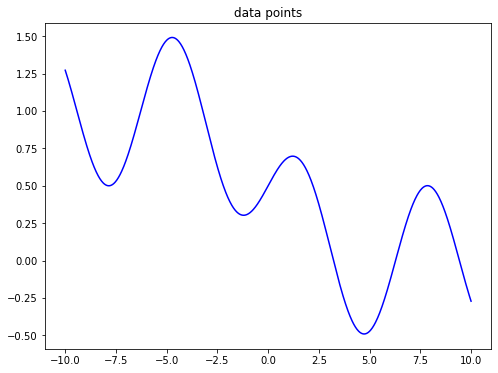

**************************************************
## [RESULT 02]
**************************************************


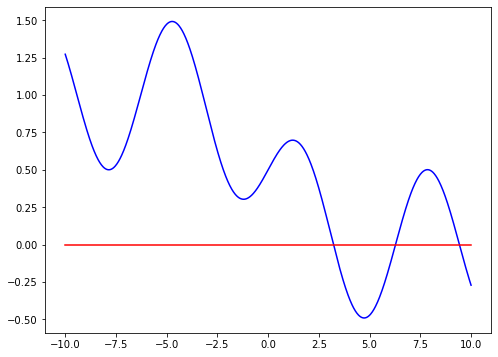

**************************************************
## [RESULT 03]
**************************************************


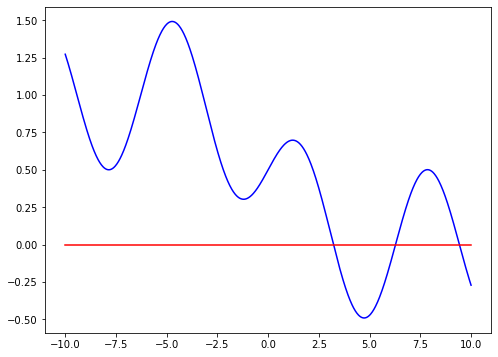

**************************************************
## [RESULT 04]
**************************************************


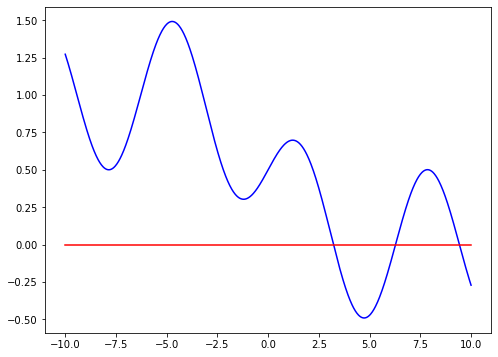

**************************************************
## [RESULT 05]
**************************************************


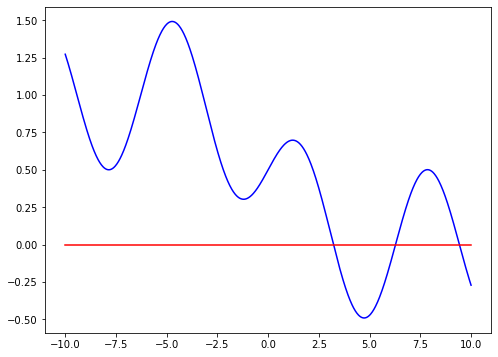

**************************************************
## [RESULT 06]
**************************************************


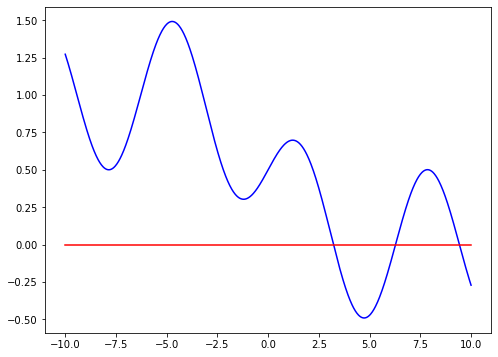

**************************************************
## [RESULT 07]
**************************************************


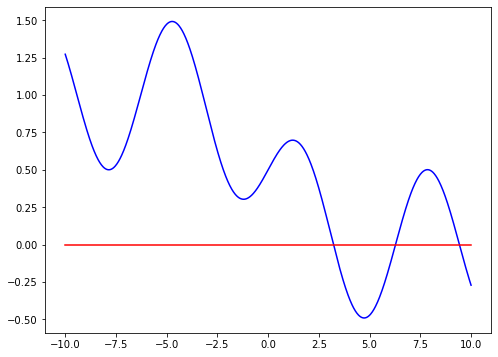

**************************************************
## [RESULT 08]
**************************************************


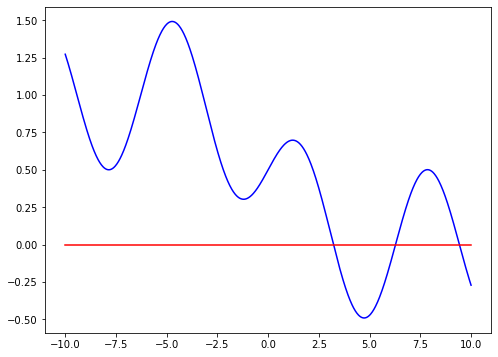

**************************************************
## [RESULT 09]
**************************************************


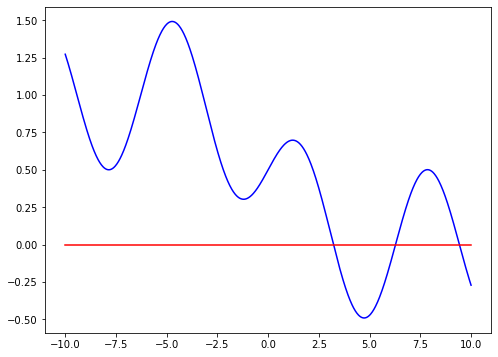

**************************************************
## [RESULT 10]
**************************************************


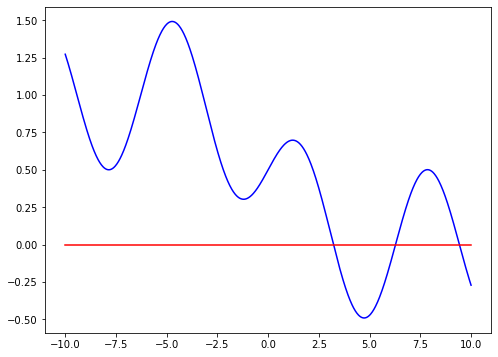

**************************************************
## [RESULT 11]
**************************************************


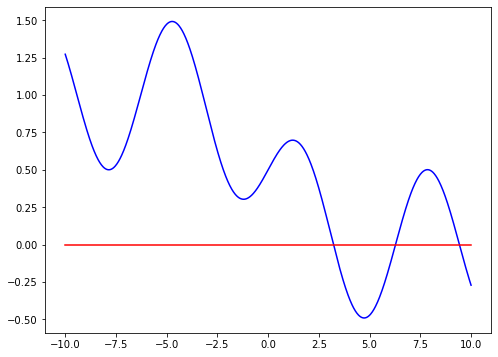

**************************************************
## [RESULT 12]
**************************************************
loss =  0
**************************************************
## [RESULT 13]
**************************************************
loss =  0
**************************************************
## [RESULT 14]
**************************************************
loss =  0
**************************************************
## [RESULT 15]
**************************************************
loss =  0


In [26]:
number_result = 15

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)